# Author : Sachin Pathania                                              
##### LinkdIn : https://www.linkedin.com/in/sachinpathania/

## CAPSTONE: Clustering Customer Behavior Based on E-commerce Event Data

# Problem Statement:

## In a modern e-commerce platform, understanding customer behavior is critical for optimizing user experience and increasing sales. The provided dataset contains information about user interactions with various products on the platform, including event types, product categories, brands, prices, and user sessions.

## This is an unsupervised machine learning problem aimed at uncovering hidden patterns in user behavior to group similar users or actions. These insights could assist in personalizing user experiences, targeting advertisements, or improving product recommendations.

## For this problem statement you can use complete data and cluster it to find top themes.
## Provide solution which consists of:
- Data Cleaning & preprocessing
- Features selected.
- Clustering and number of clusters identified /suggested by you as Data Scientist
- Evaluation of model
- Insights for Business
#### Use the “Ecommerce_data”’ table from the Database.db file for the project.

# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
#SQLite connector
import sqlite3

# 2. Connect to the SQLite database file

In [9]:
# Connect to the SQLite database file
conn = sqlite3.connect('Database.db')
# Create a cursor object
cursor = conn.cursor()
# Query to retrieve table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [10]:
# Fetch all table names from database
tables = cursor.fetchall()

In [11]:
tables

[('Electric_cars',),
 ('Fraud_detection',),
 ('Heart_disease',),
 ('Insurance_Prediction',),
 ('TripAdviser_Reviews',),
 ('Ecommerce_data',),
 ('Automobile_data',),
 ('Supermarket_data',)]

In [12]:
# Print the table names
for table in tables:
    print(table[0])

Electric_cars
Fraud_detection
Heart_disease
Insurance_Prediction
TripAdviser_Reviews
Ecommerce_data
Automobile_data
Supermarket_data


In [13]:
# Close the connection
conn.close()

# 3. Load the Data

In [14]:
conn = sqlite3.connect('Database.db')
df_ecommerce = pd.read_sql_query('Select * from Ecommerce_data' , conn)

In [15]:
df_ecommerce.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00 UTC,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01 UTC,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01 UTC,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02 UTC,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03 UTC,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc


In [18]:
df_ecommerce.shape,df_ecommerce.size

((1000000, 9), 9000000)

In [19]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1000000 non-null  object 
 1   event_type     1000000 non-null  object 
 2   product_id     1000000 non-null  int64  
 3   category_id    1000000 non-null  int64  
 4   category_code  915317 non-null   object 
 5   brand          895048 non-null   object 
 6   price          1000000 non-null  float64
 7   user_id        1000000 non-null  int64  
 8   user_session   999994 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 68.7+ MB


In [21]:
df_ecommerce.describe(include='all')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,1000000,1000000,1.000000e+06,1.000000e+06,915317,895048,1000000.000000,1.000000e+06,999994
unique,50520,3,NaN,NaN,136,2921,NaN,NaN,182715
top,2020-04-01 12:31:41 UTC,view,NaN,NaN,construction.tools.light,samsung,NaN,NaN,3783af17-7bfd-4d74-9519-cb34a990fcdc
freq,98,918022,NaN,NaN,241041,137065,NaN,NaN,1811
mean,NaN,NaN,3.283568e+07,2.172217e+18,NaN,NaN,311.880428,5.752292e+08,NaN
std,NaN,NaN,4.187056e+07,8.479174e+16,NaN,NaN,369.086812,4.505875e+07,NaN
min,NaN,NaN,1.000978e+06,2.053014e+18,NaN,NaN,0.000000,1.046558e+08,NaN
25%,NaN,NaN,1.307331e+06,2.053014e+18,NaN,NaN,69.320000,5.296691e+08,NaN
50%,NaN,NaN,8.800773e+06,2.232732e+18,NaN,NaN,187.910000,5.738721e+08,NaN
75%,NaN,NaN,1.000111e+08,2.232732e+18,NaN,NaN,398.720000,6.210633e+08,NaN


In [22]:
df_ecommerce.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code     84683
brand            104952
price                 0
user_id               0
user_session          6
dtype: int64

### -- category_code  and brand contains null values

<Axes: xlabel='price', ylabel='Density'>

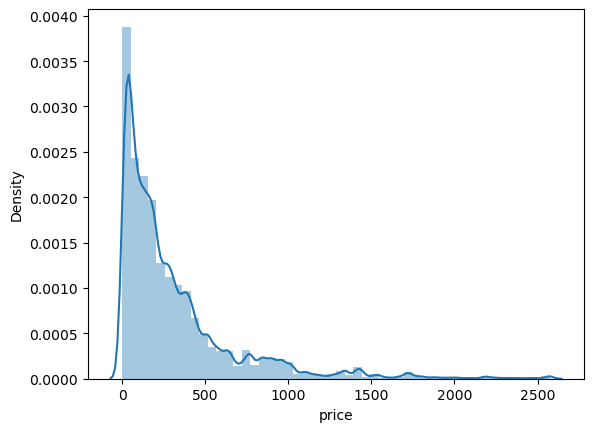

In [25]:
sns.distplot(df_ecommerce['price'])

In [28]:
df_ecommerce['price'].describe()

count    1000000.000000
mean         311.880428
std          369.086812
min            0.000000
25%           69.320000
50%          187.910000
75%          398.720000
max         2574.070000
Name: price, dtype: float64

In [29]:
df_ecommerce[df_ecommerce['price']==0].shape

(1773, 9)

# 6. Data Cleaning & preprocessing

In [31]:
df_ecommerce[df_ecommerce['price']==0]['brand'].unique()

array([None], dtype=object)

## NOTE: Remove invalid prices

In [49]:
df_ecommerce = df_ecommerce[df_ecommerce['price']>0].reset_index(drop=True)

In [50]:
df_ecommerce.shape

(998227, 9)

## Creating new dataframe

In [51]:
df_copy = df_ecommerce.copy()

In [52]:
df_copy.shape

(998227, 9)

# fill null values

In [53]:
df_copy['category_code'] = df_copy['category_code'].fillna('unknown')
df_copy['brand'] = df_copy['brand'].fillna('unknown')

In [54]:
df_copy[['category','sub_category','sub_sub_category']]=df_copy['category_code'].str.split('.', n=2, expand=True)

In [55]:
df_copy.isnull().sum()

event_time               0
event_type               0
product_id               0
category_id              0
category_code            0
brand                    0
price                    0
user_id                  0
user_session             6
category                 0
sub_category         84445
sub_sub_category    272321
dtype: int64

In [58]:
df_copy['sub_category'] = df_copy['sub_category'].fillna('unknown')
df_copy['sub_sub_category'] = df_copy['sub_sub_category'].fillna('unknown')

In [59]:
df_copy.isnull().sum()

event_time          0
event_type          0
product_id          0
category_id         0
category_code       0
brand               0
price               0
user_id             0
user_session        6
category            0
sub_category        0
sub_sub_category    0
dtype: int64

In [60]:
print(df_copy['category'].unique())
print(df_copy['sub_category'].unique())
print(df_copy['sub_sub_category'].unique())

['apparel' 'electronics' 'appliances' 'construction' 'computers' 'unknown'
 'auto' 'sport' 'medicine' 'furniture' 'kids' 'accessories' 'country_yard'
 'stationery']
['shoes' 'audio' 'kitchen' 'scarf' 'tools' 'desktop' 'clocks'
 'environment' 'unknown' 'personal' 'accessories' 'bicycle' 'components'
 'bedroom' 'toys' 'peripherals' 'ski' 'costume' 'skates' 'tennis'
 'trainer' 'shorts' 'wallet' 'notebook' 'sewing_machine' 'lawn_mower'
 'ebooks' 'living_room' 'video' 'swing' 'camera' 'universal' 'bag'
 'underwear' 'snowboard' 'jumper' 'shirt' 'bathroom' 'trousers' 'sock'
 'jeans' 'cultivator' 'ironing_board' 'tablet' 'furniture' 'pajamas'
 'tshirt' 'umbrella' 'dolls' 'smartphone' 'carriage' 'telephone' 'skirt'
 'glove' 'cartrige' 'fmcg' 'diving' 'belt' 'jacket' 'dress' 'iron']
['slipons' 'headphone' 'refrigerators' 'unknown' 'light' 'washer' 'vacuum'
 'sandals' 'toster' 'hair_cutter' 'compressor' 'massager' 'drill' 'cooler'
 'welding' 'hob' 'tonometer' 'bed' 'oven' 'alarm' 'printer' 'fauce

# Convert time fields

In [63]:
df_copy['event_time'] = pd.to_datetime(df_copy['event_time'])
df_copy['event_hour'] = df_copy['event_time'].dt.hour
df_copy['event_dayofweek'] = df_copy['event_time'].dt.dayofweek

In [64]:
df_copy.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category,sub_category,sub_sub_category,event_hour,event_dayofweek
0,2020-04-01 00:00:00+00:00,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851,apparel,shoes,slipons,0,2
1,2020-04-01 00:00:01+00:00,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6,electronics,audio,headphone,0,2
2,2020-04-01 00:00:01+00:00,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e,appliances,kitchen,refrigerators,0,2
3,2020-04-01 00:00:02+00:00,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8,electronics,audio,headphone,0,2
4,2020-04-01 00:00:03+00:00,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc,apparel,scarf,unknown,0,2


In [68]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998227 entries, 0 to 998226
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   event_time        998227 non-null  datetime64[ns, UTC]
 1   event_type        998227 non-null  object             
 2   product_id        998227 non-null  int64              
 3   category_id       998227 non-null  int64              
 4   category_code     998227 non-null  object             
 5   brand             998227 non-null  object             
 6   price             998227 non-null  float64            
 7   user_id           998227 non-null  int64              
 8   user_session      998221 non-null  object             
 9   category          998227 non-null  object             
 10  sub_category      998227 non-null  object             
 11  sub_sub_category  998227 non-null  object             
 12  event_hour        998227 non-null  int64    

# 7.Exploratory Data Analysis (EDA)

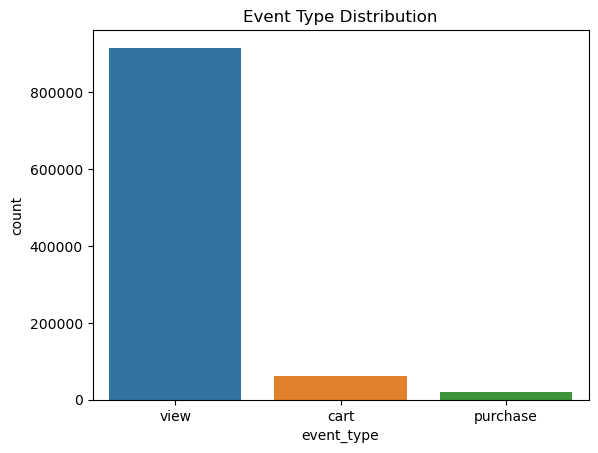

view        91.791246
cart         6.183163
purchase     2.025591
Name: event_type, dtype: float64


In [75]:
# Event Type Distribution
sns.countplot(data=df_copy, x='event_type', order=df_copy['event_type'].value_counts(normalize=True).index)
plt.title('Event Type Distribution')
plt.show()
print(df_copy['event_type'].value_counts(normalize=True)*100)

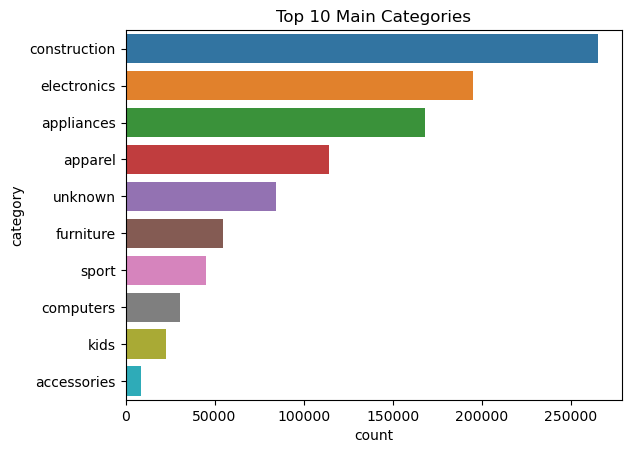

In [78]:
# Popular Categories
sns.countplot(data=df_copy, y='category', order=df_copy['category'].value_counts().head(10).index)
plt.title('Top 10 Main Categories')
plt.show()

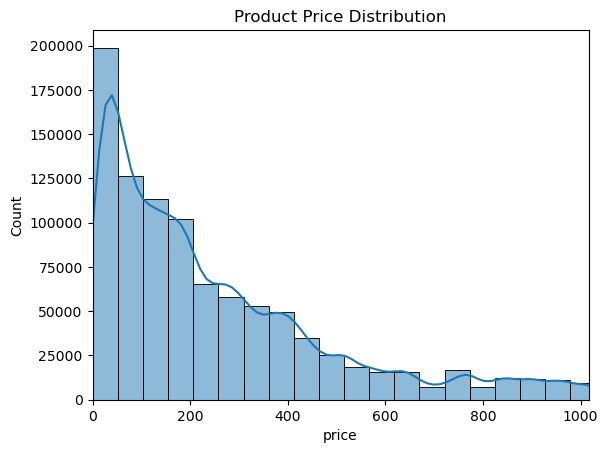

In [81]:
# Price Distribution
sns.histplot(df_copy['price'], bins=50, kde=True)
plt.title('Product Price Distribution')
plt.xlim(0, df_copy['price'].quantile(0.95))
plt.show()

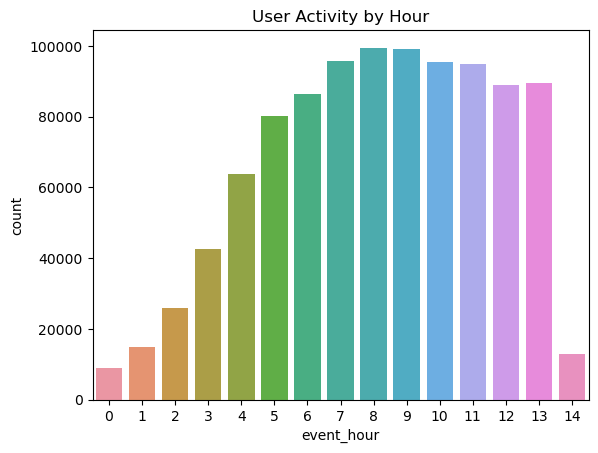

In [82]:
# User Activity by Hour
df_copy['event_hour'] = pd.to_datetime(df_copy['event_time']).dt.hour
sns.countplot(data=df_copy, x='event_hour')
plt.title('User Activity by Hour')
plt.show()

# 8.Feature Engineering & Selection

In [115]:
df_ecommerce['price'].describe()

count    998227.000000
mean        312.434374
std         369.180118
min           0.770000
25%          69.470000
50%         190.200000
75%         398.720000
max        2574.070000
Name: price, dtype: float64

In [116]:
df_encoded = pd.get_dummies(df_copy, columns=[
    'event_type', 'brand',
    'category', 'sub_category', 'sub_sub_category'
], drop_first=True)


In [117]:
df_copy['price'] = np.where(df_copy['price'] > df_copy['price'].quantile(0.95),
                               df_copy['price'].quantile(0.95),
                               df_copy['price'])

In [118]:
df_copy['price'].describe()

count    998227.000000
mean        287.728061
std         284.032280
min           0.770000
25%          69.470000
50%         190.200000
75%         398.720000
max        1016.240000
Name: price, dtype: float64

In [141]:
# Aggregate per User-Session
agg_df = df_copy.groupby(['user_id', 'user_session']).agg({
    'price': ['mean', 'sum'],
    'event_type': 'nunique',
    'product_id':'nunique',
     'brand': 'nunique',
    'category': 'nunique',
    'sub_category': 'nunique', 
    'sub_sub_category': 'nunique',
    'event_hour': 'mean'
}).reset_index()
agg_df.columns = ['_'.join(col).strip('_') for col in agg_df.columns.values]

In [142]:
df_copy['event_dayofweek'].unique()

array([2], dtype=int64)

In [143]:
agg_df.head(5)

,user_id,user_session,price_mean,price_sum,event_type_nunique,product_id_nunique,brand_nunique,category_nunique,sub_category_nunique,sub_sub_category_nunique,event_hour_mean
0,104655840,be91b567-d210-482b-94d1-23b36da3575f,9.910000,9.91,1,1,1,1,1,1,13.0
1,128968633,18c772dc-1de1-4109-b607-35f31871753e,195.326111,3515.87,1,18,5,2,3,3,12.0
2,176250879,c58645b7-cb20-435a-a103-9cd583080670,420.800000,1262.40,1,3,1,1,1,1,4.0
3,178539771,0550961e-a29b-4101-9eb8-22f0b89288da,566.270000,566.27,1,1,1,1,1,1,13.0
4,208005640,385ab386-2225-4c33-ba5a-1dfd68c33033,281.057500,1124.23,1,4,3,1,1,1,6.0


In [144]:
agg_df.corr()

,user_id,price_mean,price_sum,event_type_nunique,product_id_nunique,brand_nunique,category_nunique,sub_category_nunique,sub_sub_category_nunique,event_hour_mean
user_id,1.000000,-0.001188,-0.010822,0.010666,-0.009455,-0.023618,-0.001018,0.003129,-0.000507,0.010234
price_mean,-0.001188,1.000000,0.347394,-0.044011,-0.015941,-0.100884,-0.073442,-0.074502,-0.050036,0.028310
price_sum,-0.010822,0.347394,1.000000,0.141691,0.558125,0.367898,0.199706,0.205034,0.241660,0.015518
event_type_nunique,0.010666,-0.044011,0.141691,1.000000,0.017720,0.009467,-0.013822,-0.015706,-0.009453,-0.004437
product_id_nunique,-0.009455,-0.015941,0.558125,0.017720,1.000000,0.625141,0.367867,0.392976,0.388538,0.000161
brand_nunique,-0.023618,-0.100884,0.367898,0.009467,0.625141,1.000000,0.609145,0.630861,0.613669,-0.001113
category_nunique,-0.001018,-0.073442,0.199706,-0.013822,0.367867,0.609145,1.000000,0.960738,0.871694,-0.004524
sub_category_nunique,0.003129,-0.074502,0.205034,-0.015706,0.392976,0.630861,0.960738,1.000000,0.882881,-0.004602
sub_sub_category_nunique,-0.000507,-0.050036,0.241660,-0.009453,0.388538,0.613669,0.871694,0.882881,1.000000,-0.001870
event_hour_mean,0.010234,0.028310,0.015518,-0.004437,0.000161,-0.001113,-0.004524,-0.004602,-0.001870,1.000000


In [145]:
agg_df.skew()

user_id                      -0.150147
price_mean                    1.195069
price_sum                    12.714275
event_type_nunique            2.144438
product_id_nunique          118.213598
brand_nunique                 5.133143
category_nunique              4.163261
sub_category_nunique          5.659270
sub_sub_category_nunique      5.609462
event_hour_mean              -0.230850
dtype: float64

# 9.Clustering & Evaluation

In [138]:
features = agg_df.drop(['user_id', 'user_session','brand_nunique','product_id_nunique'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [146]:
agg_df.columns

Index(['user_id', 'user_session', 'price_mean', 'price_sum',
       'event_type_nunique', 'product_id_nunique', 'brand_nunique',
       'category_nunique', 'sub_category_nunique', 'sub_sub_category_nunique',
       'event_hour_mean'],
      dtype='object')

In [155]:
features = ['price_mean', 'product_id_nunique', 'brand_nunique', 'event_type_nunique']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(agg_df[features])

# Evaluation of model

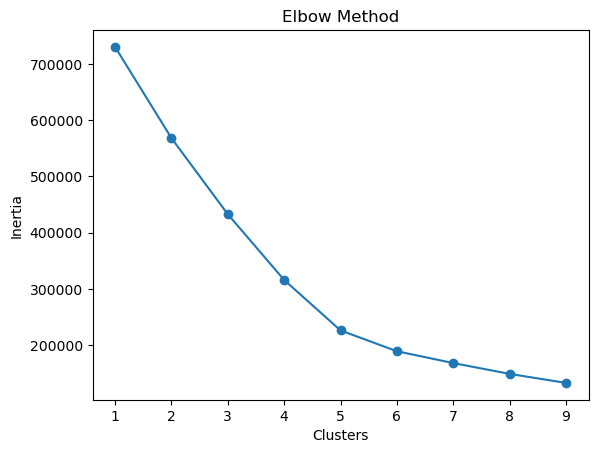

In [156]:
# Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++',)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [164]:
kmeans = KMeans(n_clusters=4, random_state=42)
agg_df['cluster'] = kmeans.fit_predict(scaled_data)

In [165]:
# Silhouette Score
score = silhouette_score(scaled_data, agg_df['cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.51


# Tag clusters with original data

In [168]:
####################################################
# Merge only cluster labels back to df_copy
df_copy = df_copy.merge(agg_df[['user_id', 'user_session', 'cluster']], 
                        on=['user_id', 'user_session'], 
                        how='left')

In [169]:
df_copy['cluster'].value_counts()


0.0    345291
3.0    292447
2.0    238070
1.0    122413
Name: cluster, dtype: int64

In [170]:
agg_df['cluster'].value_counts()


0    107077
1     33861
2     28114
3     13600
Name: cluster, dtype: int64

In [171]:
df_copy.groupby('cluster')['user_id'].nunique()

cluster
0.0    92994
1.0    29683
2.0    23634
3.0    12852
Name: user_id, dtype: int64

In [174]:
agg_df.groupby('cluster')['user_id'].nunique()

cluster
0    92994
1    29683
2    23634
3    12852
Name: user_id, dtype: int64

In [172]:
agg_df.shape

(182652, 12)

In [173]:
df_copy.shape

(998227, 17)

In [182]:
cluster_summary = df_copy.groupby('cluster').agg({
    'user_id': 'nunique',
    'price': ['mean', 'sum'],
    'category_code': 'nunique',
    'brand': 'nunique',
    'event_type': 'count'
}).reset_index()

In [183]:
cluster_summary

cluster user_id       price              category_code   brand event_type
          nunique        mean          sum       nunique nunique      count
0     0.0   92994  190.011639  65609309.00           136    2395     345291
1     1.0   29683  746.929299  91433856.24           116     844     122413
2     2.0   23634  248.148918  59076812.92           125    1409     238070
3     3.0   12852  243.110134  71096829.23           136    2504     292447

In [184]:
cluster_summary.columns = ['cluster', 'unique_users', 'avg_price', 'total_price', 
                           'unique_products', 'unique_brands', 'activity_count']

# Optional: derive additional metrics
cluster_summary['avg_activity'] = cluster_summary['activity_count'] / cluster_summary['unique_users']
cluster_summary['avg_spend'] = cluster_summary['total_price'] / cluster_summary['unique_users']

In [185]:
cluster_summary

,cluster,unique_users,avg_price,total_price,unique_products,unique_brands,activity_count,avg_activity,avg_spend
0,0.0,92994,190.011639,65609309.00,136,2395,345291,3.713046,705.521958
1,1.0,29683,746.929299,91433856.24,116,844,122413,4.124010,3080.344178
2,2.0,23634,248.148918,59076812.92,125,1409,238070,10.073200,2499.653589
3,3.0,12852,243.110134,71096829.23,136,2504,292447,22.754980,5531.966171


# Insights for Business

In [188]:
# Add concise behavior and strategy
cluster_summary['behavior'] = ''
cluster_summary['strategy'] = ''

for idx, row in cluster_summary.iterrows():
    avg_activity = row['avg_activity']
    avg_spend = row['avg_spend']
    
    if avg_spend > 5000:
        behavior = "High spend, very active"
        strategy = "Upsell premium, exclusives"
    elif avg_spend > 3000:
        behavior = "High spend, moderate active"
        strategy = "Offer high-value products"
    elif avg_activity > 10 and avg_spend > 2000:
        behavior = "Active, value-driven"
        strategy = "Bundles, loyalty rewards"
    else:
        behavior = "Low spend, low active"
        strategy = "Small discounts, drive visits"
    
    cluster_summary.loc[idx, 'behavior'] = behavior
    cluster_summary.loc[idx, 'strategy'] = strategy


In [189]:
cluster_summary

,cluster,unique_users,avg_price,total_price,unique_products,unique_brands,activity_count,avg_activity,avg_spend,behavior,strategy
0,0.0,92994,190.011639,65609309.00,136,2395,345291,3.713046,705.521958,"Low spend, low active","Small discounts, drive visits"
1,1.0,29683,746.929299,91433856.24,116,844,122413,4.124010,3080.344178,"High spend, moderate active",Offer high-value products
2,2.0,23634,248.148918,59076812.92,125,1409,238070,10.073200,2499.653589,"Active, value-driven","Bundles, loyalty rewards"
3,3.0,12852,243.110134,71096829.23,136,2504,292447,22.754980,5531.966171,"High spend, very active","Upsell premium, exclusives"


## Key Business Insights
- Majority of users (Cluster 0) are low engagement, low spend — huge opportunity to convert with targeted entry-level discounts and campaigns.

- Cluster 1 represents affluent shoppers who make high-value purchases despite moderate activity — ideal candidates for premium product recommendations, early access deals.

- Cluster 2 shows highly active, value-conscious users — they engage often and explore products, but spending is moderate. Use bundles, loyalty points, and personalized offers to convert frequent visits into higher spend.

- Cluster 3 contains your most valuable segment — high spenders with very high activity. Prioritize them with exclusivity, premium upsells, VIP treatment to boost lifetime value.

# END